In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import itertools
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data, remove the target variable as well as any remaining NaN columns to be sure (none should exist after preprocessing)
df_health_full = pd.read_csv('health_data_preprocessed.csv')

df_health_full.drop('DRK_YN', axis=1,inplace=True)
df_health_full.dropna(inplace=True)

df_health_largest_sample = df_health_full.sample(50000,random_state=42)

# Apply PCA to reduce the data to two components for two dimensional plotting.
pca_largest_sample = PCA(n_components=2, random_state=42) 
pca_largest_sample = pca_largest_sample.fit_transform(df_health_largest_sample)
print(len(pca_largest_sample))

50000


In [3]:
# Create and train the Hierarchical clustering model
hc_pca = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels_pca = hc_pca.fit_predict(pca_largest_sample)

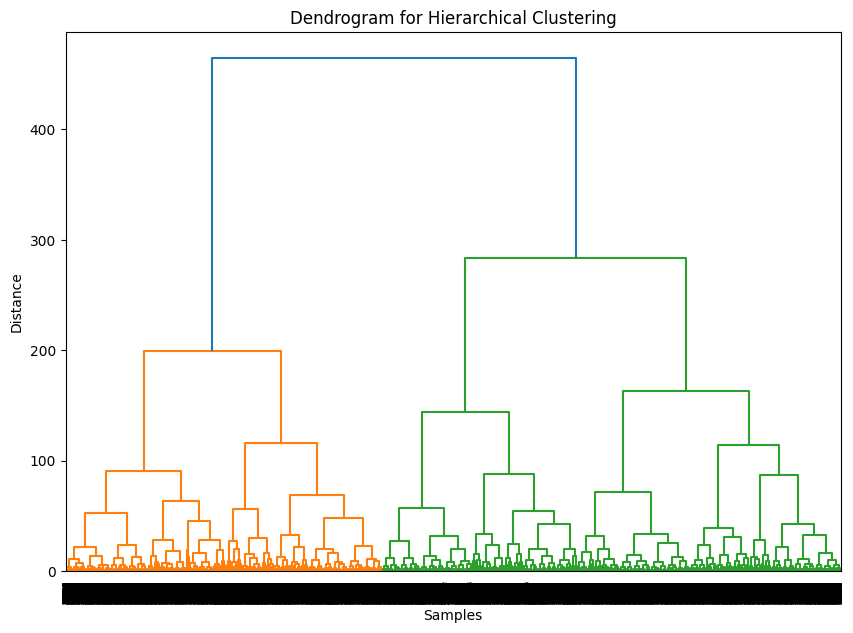

In [4]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_largest_sample, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

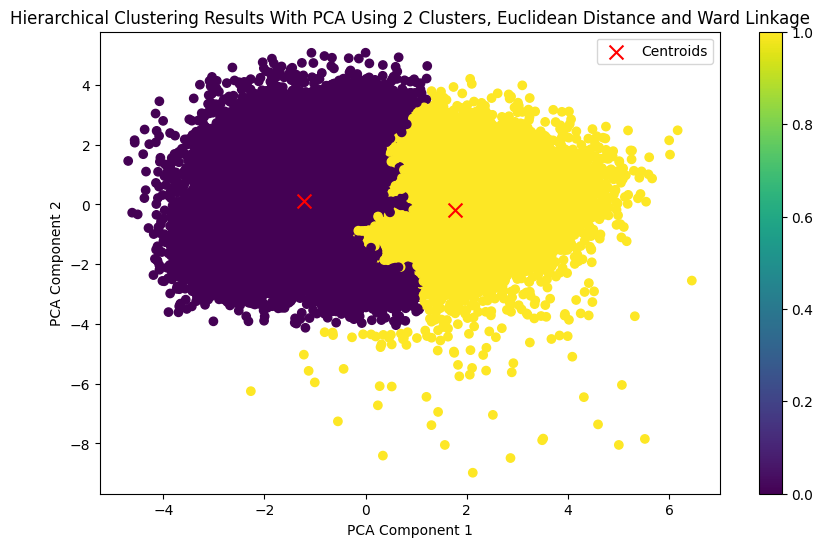

In [5]:
# Calculate the centroids
unique_labels = np.unique(labels_pca)
centroids = np.array([pca_largest_sample[labels_pca == label].mean(axis=0) for label in unique_labels])

# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_largest_sample[:, 0], pca_largest_sample[:, 1], c=labels_pca, cmap='viridis')
plt.colorbar(scatter)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Hierarchical Clustering Results With PCA Using 2 Clusters, Euclidean Distance and Ward Linkage')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [6]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_largest_sample, labels_pca)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(pca_largest_sample, labels_pca)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(pca_largest_sample, labels_pca)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

Silhouette Score: 0.38402545279442113
Davies-Bouldin Index: 0.9947
Calinski-Harabasz Score: 37015.3659


In [ ]:
#### trying it for height and gamma gtp as determined by the tree ###

In [13]:
# Load data, remove the target variable as well as any remaining NaN columns to be sure (none should exist after preprocessing)
df_health_height_gammagtp = pd.read_csv('health_data_preprocessed.csv')

df_health_height_gammagtp.drop('DRK_YN', axis=1,inplace=True)
df_health_height_gammagtp.dropna(inplace=True)

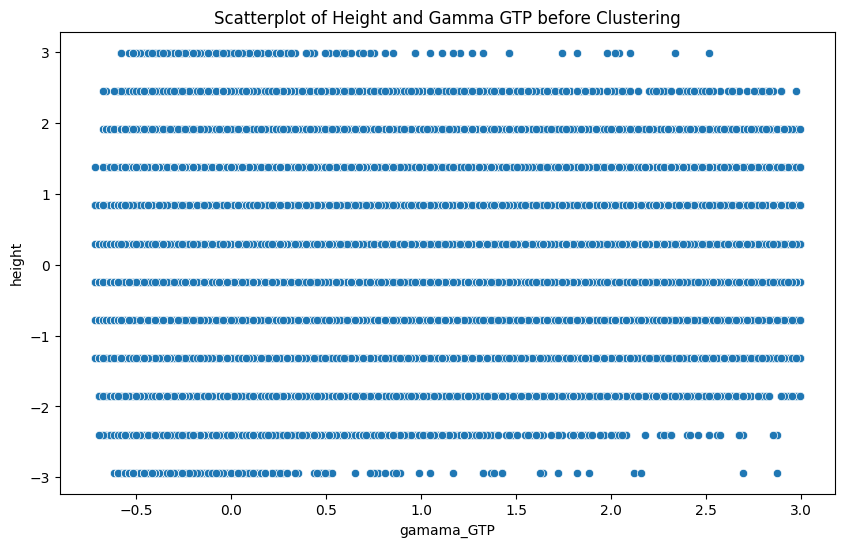

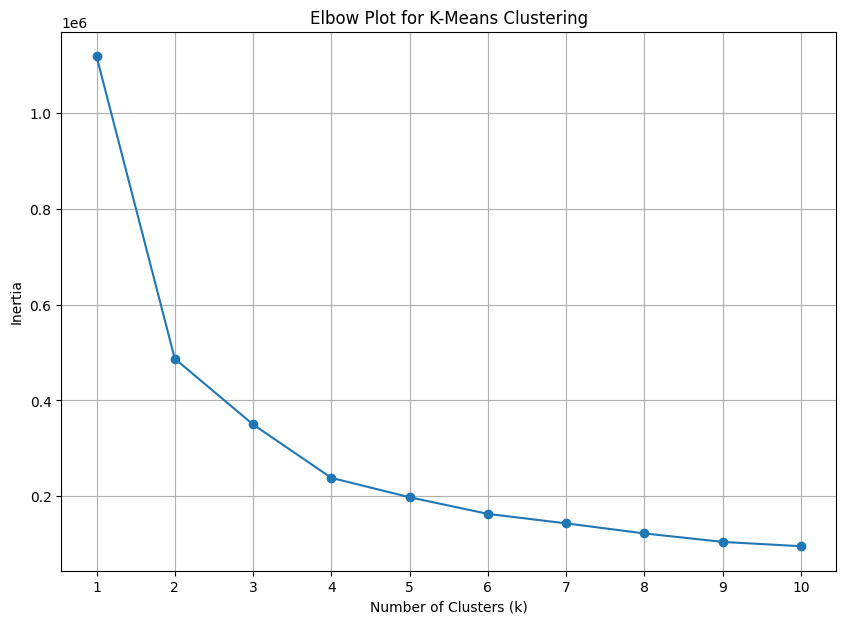

In [ ]:
# Select relevant features for clustering

features = ['gamma_GTP', 'height']
X = df_health_height_gammagtp[features]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gamma_GTP', y='height', data=X)
plt.title('Scatterplot of Height and Gamma GTP before Clustering')
plt.xlabel('gamma_GTP')
plt.ylabel('height')
plt.show()


# Calculate the variances for the Elbow Plot
inertia = []
k_values = range(1, 11)  # Use k values from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Create the Elbow Plot
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [19]:
# Create and train the Hierarchical clustering model on a sample
X_largest_sample = X.sample(50000, random_state=42)
hc_height_gammagtp = AgglomerativeClustering(n_clusters=12, metric='euclidean', linkage='ward')
labels_height_gammagtp = hc_height_gammagtp.fit_predict(X_largest_sample)

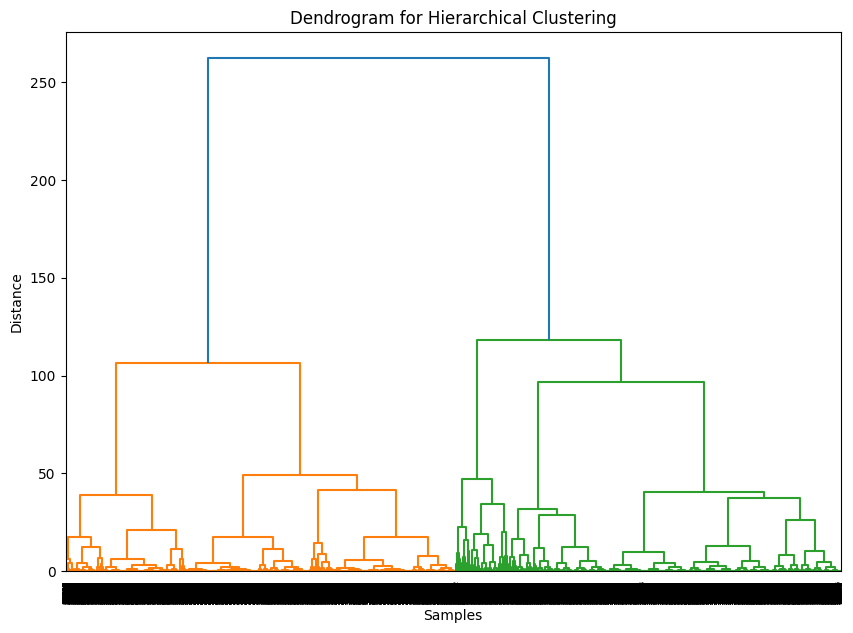

In [20]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X_largest_sample, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


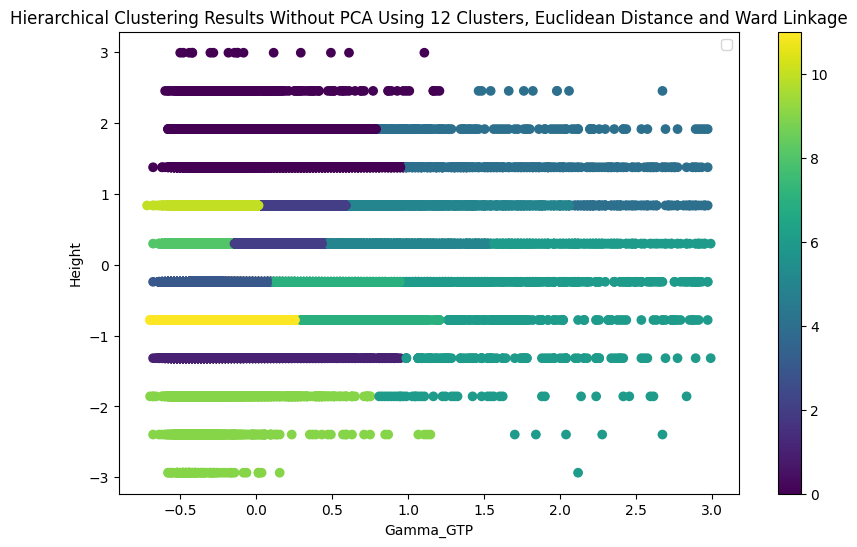

In [31]:
# Calculate the centroids
unique_labels_gammagtp = np.unique(labels_height_gammagtp)
centroids = np.array([X_largest_sample[labels == label].mean(axis=0) for label in unique_labels_gammagtp])

# Visualize the results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_largest_sample['gamma_GTP'], X_largest_sample['height'], c=labels_height_gammagtp, cmap='viridis')
plt.colorbar(scatter)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Hierarchical Clustering Results Without PCA Using 12 Clusters, Euclidean Distance and Ward Linkage')
plt.xlabel('Gamma_GTP')
plt.ylabel('Height')
plt.legend()
plt.show()

In [26]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_largest_sample, labels_height_gammagtp)
print("Silhouette Score:", silhouette_avg)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_largest_sample, labels_height_gammagtp)
print(f'Davies-Bouldin Index: {db_index:.4f}')

# Calculate Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_largest_sample, labels_height_gammagtp)
print(f'Calinski-Harabasz Score: {ch_score:.4f}')

Silhouette Score: 0.5331679580334339
Davies-Bouldin Index: 0.7800
Calinski-Harabasz Score: 56498.3765
